In [1]:
# Step 1: Import required libraries
import pandas as pd

# Step 2: Load detailed labels CSV
df = pd.read_csv('/content/detailed_lables (1).csv')

# ===============================
# Step 3: PTSD Raw Score (use severity)
# ===============================
ptsd_raw = df[['Participant', 'PTSD_severity']].copy()
ptsd_raw.rename(columns={'PTSD_severity': 'PTSD_Raw_Score'}, inplace=True)
ptsd_raw_dict = dict(zip(ptsd_raw['Participant'], ptsd_raw['PTSD_Raw_Score']))

# ===============================
# Step 4: Depression Raw Score (use severity)
# ===============================
depression_raw = df[['Participant', 'Depression_severity']].copy()
depression_raw.rename(columns={'Depression_severity': 'Depression_Raw_Score'}, inplace=True)
depression_raw_dict = dict(zip(depression_raw['Participant'], depression_raw['Depression_Raw_Score']))

# ===============================
# Step 5: Appetite Raw Score
# ===============================
appetite_raw = df[['Participant', 'PHQ8_5_Appetite']].copy()
appetite_raw.rename(columns={'PHQ8_5_Appetite': 'Appetite_Raw_Score'}, inplace=True)
appetite_raw_dict = dict(zip(appetite_raw['Participant'], appetite_raw['Appetite_Raw_Score']))

# ===============================
# Step 6: Agency Raw Score
# ===============================
df['PHQ8_Agency_score'] = (12 - (df['PHQ8_1_NoInterest'] + df['PHQ8_2_Depressed'] +
                                 df['PHQ8_6_Failure'] + df['PHQ8_7_Concentration'])) / 9

pclc_cognitive_mood = (
    df['PCL-C_8_TroubleRemembering'] + df['PCL-C_9_NoInterest'] +
    df['PCL-C_10_FeelDistant'] + df['PCL-C_11_FeelNumb'] +
    df['PCL-C_12_Future_Cut_Short'] + df['PCL-C_13_Sleep'] +
    df['PCL-C_14_Irritability']
) / 35

pclc_hyperarousal = (
    df['PCL-C_15_Concentration'] + df['PCL-C_16_HyperAlert'] +
    df['PCL-C_17_Jumpy']
) / 15

df['PCLC_Agency_score'] = 1 - 0.5 * (pclc_cognitive_mood + pclc_hyperarousal)
df['Avg_Psychological_Agency'] = (df['PHQ8_Agency_score'] + df['PCLC_Agency_score']) / 2

agency_raw = df[['Participant', 'Avg_Psychological_Agency']].copy()
agency_raw.rename(columns={'Avg_Psychological_Agency': 'Agency_Raw_Score'}, inplace=True)
agency_raw_dict = dict(zip(agency_raw['Participant'], agency_raw['Agency_Raw_Score']))

# ===============================
# Step 7: Anxiety Raw Score
# ===============================
anxiety_items = [
    'PHQ8_3_Sleep', 'PHQ8_4_Tired', 'PHQ8_7_Concentration', 'PHQ8_8_Psychomotor',
    'PCL-C_13_Sleep', 'PCL-C_14_Irritability', 'PCL-C_15_Concentration',
    'PCL-C_16_HyperAlert', 'PCL-C_17_Jumpy'
]
df['Anxiety_Raw_Score'] = df[anxiety_items].sum(axis=1)

anxiety_raw = df[['Participant', 'Anxiety_Raw_Score']].copy()
anxiety_raw_dict = dict(zip(anxiety_raw['Participant'], anxiety_raw['Anxiety_Raw_Score']))

# ===============================
# Step 8: Sleep Raw Score
# ===============================
df['Sleep_Raw_Score'] = df['PHQ8_3_Sleep'] + df['PCL-C_13_Sleep']
sleep_raw = df[['Participant', 'Sleep_Raw_Score']].copy()
sleep_raw_dict = dict(zip(sleep_raw['Participant'], sleep_raw['Sleep_Raw_Score']))

# ===============================
# Step 9: Preview combined raw scores
# ===============================
preview_df = pd.concat([
    ptsd_raw.set_index('Participant'),
    depression_raw.set_index('Participant'),
    appetite_raw.set_index('Participant'),
    agency_raw.set_index('Participant'),
    anxiety_raw.set_index('Participant'),
    sleep_raw.set_index('Participant')
], axis=1).reset_index()

print(preview_df.head())


   Participant  PTSD_Raw_Score  Depression_Raw_Score  Appetite_Raw_Score  \
0          300            25.0                     2                   1   
1          301            17.0                     3                   1   
2          302            28.0                     4                   0   
3          303            17.0                     0                   0   
4          304            20.0                     6                   2   

   Agency_Raw_Score  Anxiety_Raw_Score  Sleep_Raw_Score  
0          1.019048                 10                3  
1          1.066667                  7                2  
2          0.864286                  7                2  
3          1.066667                  5                1  
4          0.970635                 10                2  


In [2]:
# Save the merged raw scores as a single CSV file
preview_df.to_csv('/content/All_Raw_Scores_Combined.csv', index=False)


                            PTSD_Raw_Score  Depression_Raw_Score  \
PTSD_Raw_Score                    1.000000              0.850071   
Depression_Raw_Score              0.850071              1.000000   
Appetite_Raw_Score                0.634534              0.786715   
Agency_Raw_Score                 -0.908911             -0.951413   
Anxiety_Raw_Score                 0.923318              0.904767   
Sleep_Raw_Score                   0.742852              0.789910   
total_utterances                  0.055908              0.045064   
total_speaking_time               0.125862              0.106911   
avg_pause_duration                0.081393              0.094909   
max_pause_duration                0.021832              0.037431   
total_words                      -0.004819             -0.006385   
avg_words_per_utterance          -0.102093             -0.090896   
avg_word_length                  -0.065700             -0.074263   
lexical_diversity                 0.066008      

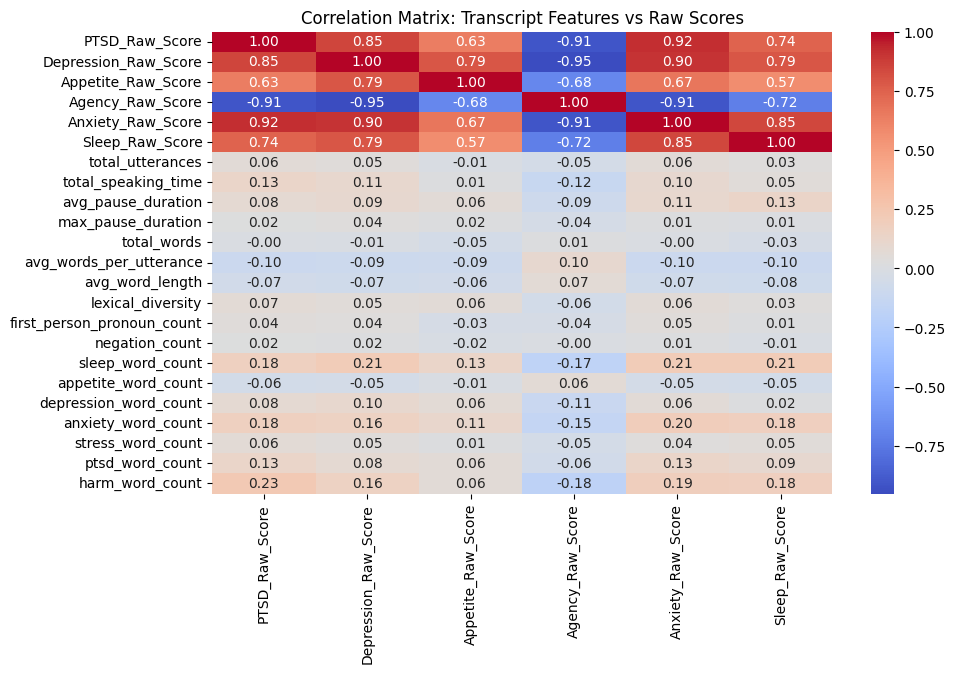

In [10]:
# Step 1: Import necessary libraries
import pandas as pd

# Step 2: Load the datasets
raw_scores_df = pd.read_csv('All_Raw_Scores_Combined.csv')
transcript_df = pd.read_csv('transcript_summary_all.csv')

# Step 3: Merge the raw scores and transcript summary data on the correct Participant ID
# Rename 'participant_id' to 'Participant' in the transcript dataframe for merging
transcript_df.rename(columns={'participant_id': 'Participant'}, inplace=True)

# Merge the datasets on the Participant column
merged_df = pd.merge(raw_scores_df, transcript_df, on='Participant', how='inner')

# Step 4: Drop the 'Participant' column and calculate correlations
# Now compute the correlations between all features (16 features from the transcript and 6 raw scores)
correlation_df = merged_df.drop(columns=['Participant']).corr()

# Step 5: Filter correlation matrix to match the structure:
# Each transcript feature should be correlated with all the 6 raw score labels
raw_score_labels = ['PTSD_Raw_Score', 'Depression_Raw_Score', 'Appetite_Raw_Score',
                    'Agency_Raw_Score', 'Anxiety_Raw_Score', 'Sleep_Raw_Score']

# Step 6: Get correlations for each feature in transcript with the 6 raw score labels
correlation_with_raw_scores = correlation_df[raw_score_labels]

# Step 7: Display the correlation results using pandas built-in display
import matplotlib.pyplot as plt

# Display the correlation results as a table
print(correlation_with_raw_scores)

# Optional: Save the correlation results to a CSV file
correlation_with_raw_scores.to_csv('/content/Correlation_Results.csv')

# If you'd like to visualize it as a heatmap (optional)
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_with_raw_scores, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix: Transcript Features vs Raw Scores")
plt.show()
